In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from datetime import datetime, timedelta

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Milestone 1

## Loading the data

In [2]:
dfstart=pd.read_csv('H2HBABBA2553.csv')
dfstart.head() #Checking the first 5 rows

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,CA02,0140104225,SAVE-ON- systems,NaN,2020.0,2.960629e+09,2020-04-16,20200416,20200416,20200427.0,CAD,RV,1.0,NaN,99601.96,20200417.0,CA10,2.960629e+09,1
1,U013,CC6000,HEINZ,2019-06-18 00:00:00,2019.0,1.991826e+09,2019-04-15,20190415,20190415,20190530.0,USD,RV,1.0,NaN,19790.33,20190415.0,NAVF,1.991826e+09,0
2,U001,0200794332,COST us,2019-09-05 00:00:00,2019.0,1.929769e+09,2019-08-22,20190820,20190822,20190906.0,USD,RV,1.0,NaN,8041.59,20190822.0,NAAX,1.929769e+09,0
3,U001,0200769623,WAL-MAR associates,NaN,2020.0,1.930682e+09,2020-03-21,20200321,20200321,20200405.0,USD,RV,1.0,NaN,6807.61,20200321.0,NAH4,1.930682e+09,1
4,U001,0200705742,DOT corporation,2019-05-13 00:00:00,2019.0,1.929223e+09,2019-04-28,20190428,20190428,20190513.0,USD,RV,1.0,NaN,16158.83,20190428.0,NAA8,1.929223e+09,0


In [3]:
dfstart.isna().sum() # checking NUll values in each column

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    5
isOpen                        0
dtype: int64

## Slicing out the records with Clearing date Null into a separate DataFrame and remaining into train

In [4]:

main_train = dfstart[dfstart.clear_date.isnull()==False] #Train set containing Not null clear_date
main_test = dfstart[dfstart.clear_date.isnull()]#Test dataset with null clear_date

In [5]:
main_train.shape #Checking the rows and columns

(40000, 19)

In [6]:
main_train.isna().sum() 
#Again checking if there are more null values present or not so that we can act accordingly in the data preprocessing step

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    5
isOpen                        0
dtype: int64

## Data Prepocessing

In [7]:
duplicateRow = main_train[main_train.duplicated()] #Checking if there are duplicate rows or not
print(duplicateRow)

      business_code cust_number        name_customer           clear_date  \
1515           U001   200936373           SUPE trust  2019-07-31 00:00:00   
2529           CA02  0140104429            COSTCO us  2019-05-13 00:00:00   
3127           U001  0200078795           H T H corp  2020-01-23 00:00:00   
3347           U001  0200777735     NASH  associates  2019-10-29 00:00:00   
4092           U001  0200729942              SA corp  2019-05-03 00:00:00   
...             ...         ...                  ...                  ...   
49872          U001  0200769623  WAL-MAR corporation  2019-09-03 00:00:00   
49888          U001  0200722444            PERFOR us  2020-02-18 00:00:00   
49895          U001  0200353024              DECA us  2019-12-02 00:00:00   
49913          U001  0200027064               CONIF   2019-02-08 00:00:00   
49946          CA02  0140104240    FEDER corporation  2019-03-21 00:00:00   

       buisness_year        doc_id posting_date  document_create_date  \
15

In [8]:
main_train=main_train.drop(['area_business','posting_id','document type','invoice_id','document_create_date'],axis=1) 
#Now dropping the columns which are not necessary for the training part

In [9]:
main_train=main_train.drop(['doc_id'],axis=1)

In [10]:
main_train=main_train.drop(['isOpen'],axis=1)

In [11]:
main_train=main_train.drop(['buisness_year'],axis=1)

In [12]:
#After dropping all the less important columns for training
main_train


,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1,U013,CC6000,HEINZ,2019-06-18 00:00:00,2019-04-15,20190415,20190530.0,USD,19790.33,20190415.0,NAVF
2,U001,0200794332,COST us,2019-09-05 00:00:00,2019-08-22,20190822,20190906.0,USD,8041.59,20190822.0,NAAX
4,U001,0200705742,DOT corporation,2019-05-13 00:00:00,2019-04-28,20190428,20190513.0,USD,16158.83,20190428.0,NAA8
5,U001,0200790107,ROU systems,2019-03-25 00:00:00,2019-03-11,20190311,20190326.0,USD,64160.98,20190311.0,NAC6
6,U001,0200720419,THUR co,2019-09-10 00:00:00,2019-08-26,20190826,20190927.0,USD,22180.00,20190826.0,NA32
...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR foundation,2019-04-16 00:00:00,2019-03-30,20190330,20190414.0,USD,2118.87,20190330.0,NAH4
49996,U001,0200769623,WAL-MAR corp,2020-03-03 00:00:00,2020-02-15,20200215,20200301.0,USD,25471.41,20200215.0,NAH4
49997,U001,0200707822,PUBLI trust,2019-07-09 00:00:00,2019-06-24,20190624,20190709.0,USD,57288.31,20190624.0,NAA8
49998,U001,200780383,MEIJ foundation,2019-04-29 00:00:00,2019-04-11,20190411,20190426.0,USD,2807.30,20190411.0,NAA8


### Date Time Conversion 

In [13]:
main_train['document_create_date.1']=pd.to_datetime(main_train['document_create_date.1'], format='%Y%m%d')
main_train['due_in_date']=pd.to_datetime(main_train.due_in_date,format='%Y%m%d')
main_train['posting_date']=pd.to_datetime(main_train['posting_date'], format='%Y %m %d')
main_train['baseline_create_date']=pd.to_datetime(main_train.baseline_create_date,format='%Y%m%d')
main_train['clear_date']= pd.to_datetime(main_train['clear_date'], format='%Y %m %d')
main_train.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
dtype: object

### Creating target column

In [14]:
main_train['delay_days']=main_train['clear_date']-main_train['due_in_date'] #Delay days=clear date-due date
main_train['delay_days']=main_train['delay_days']/np.timedelta64(1,'D')# Then converting it into floating timedelta format,D is for days

In [15]:
main_train

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days
1,U013,CC6000,HEINZ,2019-06-18,2019-04-15,2019-04-15,2019-05-30,USD,19790.33,2019-04-15,NAVF,19.0
2,U001,0200794332,COST us,2019-09-05,2019-08-22,2019-08-22,2019-09-06,USD,8041.59,2019-08-22,NAAX,-1.0
4,U001,0200705742,DOT corporation,2019-05-13,2019-04-28,2019-04-28,2019-05-13,USD,16158.83,2019-04-28,NAA8,0.0
5,U001,0200790107,ROU systems,2019-03-25,2019-03-11,2019-03-11,2019-03-26,USD,64160.98,2019-03-11,NAC6,-1.0
6,U001,0200720419,THUR co,2019-09-10,2019-08-26,2019-08-26,2019-09-27,USD,22180.00,2019-08-26,NA32,-17.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR foundation,2019-04-16,2019-03-30,2019-03-30,2019-04-14,USD,2118.87,2019-03-30,NAH4,2.0
49996,U001,0200769623,WAL-MAR corp,2020-03-03,2020-02-15,2020-02-15,2020-03-01,USD,25471.41,2020-02-15,NAH4,2.0
49997,U001,0200707822,PUBLI trust,2019-07-09,2019-06-24,2019-06-24,2019-07-09,USD,57288.31,2019-06-24,NAA8,0.0
49998,U001,200780383,MEIJ foundation,2019-04-29,2019-04-11,2019-04-11,2019-04-26,USD,2807.30,2019-04-11,NAA8,3.0


In [16]:
main_train.describe() #Checking the statistical information

,total_open_amount,delay_days
count,4.000000e+04,40000.000000
mean,3.201250e+04,0.887025
std,3.980761e+04,11.211987
min,4.400000e-01,-83.000000
25%,4.781320e+03,-3.000000
50%,1.722415e+04,0.000000
75%,4.634037e+04,2.000000
max,1.501474e+06,307.000000


In [17]:
main_train.isna().sum()  #Verifying if all the null values are removed or not

business_code             0
cust_number               0
name_customer             0
clear_date                0
posting_date              0
document_create_date.1    0
due_in_date               0
invoice_currency          0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
delay_days                0
dtype: int64

In [18]:
main_train.info()  # concise summary of the main train dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 1 to 49999
Data columns (total 12 columns):
business_code             40000 non-null object
cust_number               40000 non-null object
name_customer             40000 non-null object
clear_date                40000 non-null datetime64[ns]
posting_date              40000 non-null datetime64[ns]
document_create_date.1    40000 non-null datetime64[ns]
due_in_date               40000 non-null datetime64[ns]
invoice_currency          40000 non-null object
total_open_amount         40000 non-null float64
baseline_create_date      40000 non-null datetime64[ns]
cust_payment_terms        40000 non-null object
delay_days                40000 non-null float64
dtypes: datetime64[ns](5), float64(2), object(5)
memory usage: 4.0+ MB


In [19]:
main_train.nunique() #Checking the unique values in each column

business_code                 6
cust_number                1346
name_customer              3939
clear_date                  393
posting_date                423
document_create_date.1      423
due_in_date                 490
invoice_currency              2
total_open_amount         35607
baseline_create_date        432
cust_payment_terms           74
delay_days                  185
dtype: int64

In [20]:
for col in main_train.columns:
    if main_train[col].nunique()<= 20:
        print(main_train[col].value_counts())
        print('#########################') #Checking which columns have less than 20 unique values and then counting each record in those columns

U001    36097
CA02     3196
U013      564
U002      127
U005       14
U007        2
Name: business_code, dtype: int64
#########################
USD    36804
CAD     3196
Name: invoice_currency, dtype: int64
#########################


In [21]:
main_train.sort_values(by=['posting_date']) #Sorting according to posting date ,i.e,newer dates are at tail/last

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days
16294,U001,0200769623,WAL-MAR co,2019-01-15,2018-12-30,2018-12-30,2019-01-14,USD,65940.47,2018-12-30,NAH4,1.0
25892,U001,0200769623,WAL-MAR llc,2019-01-11,2018-12-30,2018-12-30,2019-01-14,USD,39726.13,2018-12-30,NAH4,-3.0
15211,U001,0200769623,WAL-MAR llc,2019-01-09,2018-12-30,2018-12-30,2019-01-14,USD,4763.88,2018-12-30,NAH4,-5.0
28713,U001,0200769623,WAL-MAR trust,2019-01-09,2018-12-30,2018-12-30,2019-01-14,USD,23504.45,2018-12-30,NAH4,-5.0
24921,U001,0200769623,WAL-MAR in,2019-01-09,2018-12-30,2018-12-30,2019-01-14,USD,16263.71,2018-12-30,NAH4,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23459,U001,0200895843,US associates,2020-03-13,2020-02-27,2020-02-27,2020-03-13,USD,35655.90,2020-02-27,NAA8,0.0
32029,U001,0200759878,SA in,2020-03-16,2020-02-27,2020-02-27,2020-03-13,USD,13750.69,2020-02-27,NAH4,3.0
34430,U001,0200744019,TARG foundation,2020-03-10,2020-02-27,2020-02-27,2020-03-13,USD,18132.90,2020-02-27,NAA8,-3.0
18759,U001,0100031704,DELHAIZE us,2020-03-17,2020-02-27,2020-02-27,2020-03-13,USD,109024.52,2020-02-27,NAA8,4.0


## Splitting the data

In [22]:
# Converting the main_train into X and Y so that we can pass it onto train_test_split function

# X :contains the dataframe without the target i.e delay_days
X = main_train.drop('delay_days',axis=1)

# Y : contains only the target value 
Y = main_train['delay_days']

In [23]:
from sklearn.model_selection import train_test_split #Then we are again splitting the main train into 2 parts, 30000 columns in Train and remaining 10000 in Test
X_train,X_inter_test,Y_train,Y_inter_test=train_test_split(X,Y,test_size=0.25,random_state=0,shuffle=False)

In [24]:
X_val,X_test,Y_val,Y_test=train_test_split(X_inter_test,Y_inter_test,test_size=0.5,random_state=0,shuffle=False)
#Further splitting the 10000 records dateset into Validation and Test,each having 5000 values

In [25]:
X_train.shape,X_val.shape,X_test.shape # Verifying the dimensions of Train,Test,Validate

((30000, 11), (5000, 11), (5000, 11))

### Milestone 2

## EDA

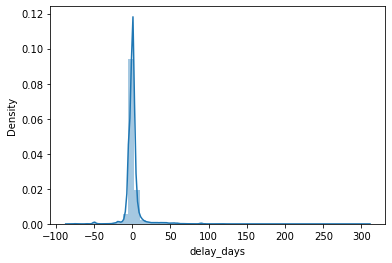

In [26]:
sns.distplot(Y_train) #Checking the distribution of target coloumn whose nature is almost Normal Distributed having bell shape

In [27]:
Y_train.describe() #Checking the min and max value of delay days

count    30000.000000
mean         0.841233
std         11.109192
min        -83.000000
25%         -3.000000
50%          0.000000
75%          2.000000
max        307.000000
Name: delay_days, dtype: float64

In [28]:
X_train.merge(Y_train,on = X_train.index) #Merged the X_train with Y-train having the delay_days

,key_0,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days
0,1,U013,CC6000,HEINZ,2019-06-18,2019-04-15,2019-04-15,2019-05-30,USD,19790.33,2019-04-15,NAVF,19.0
1,2,U001,0200794332,COST us,2019-09-05,2019-08-22,2019-08-22,2019-09-06,USD,8041.59,2019-08-22,NAAX,-1.0
2,4,U001,0200705742,DOT corporation,2019-05-13,2019-04-28,2019-04-28,2019-05-13,USD,16158.83,2019-04-28,NAA8,0.0
3,5,U001,0200790107,ROU systems,2019-03-25,2019-03-11,2019-03-11,2019-03-26,USD,64160.98,2019-03-11,NAC6,-1.0
4,6,U001,0200720419,THUR co,2019-09-10,2019-08-26,2019-08-26,2019-09-27,USD,22180.00,2019-08-26,NA32,-17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,37507,U001,0200772670,ASSOCIAT llc,2019-10-11,2019-09-26,2019-09-26,2019-10-11,USD,74373.28,2019-09-26,NAU5,0.0
29996,37508,U001,0200606231,INTER associates,2019-02-15,2019-02-01,2019-02-01,2019-02-16,USD,37838.40,2019-02-01,NAA8,-1.0
29997,37510,U001,0200782772,ASSOC G systems,2020-01-17,2020-01-03,2020-01-03,2020-01-18,USD,38155.98,2020-01-03,NAA8,-1.0
29998,37511,U001,0200706844,WINC systems,2020-03-05,2020-02-18,2020-02-18,2020-03-04,USD,4367.35,2020-02-18,NAA8,1.0


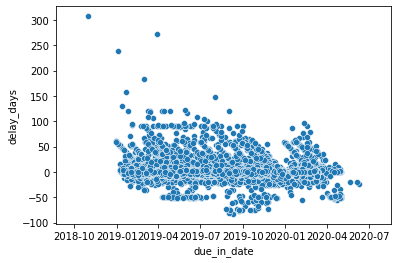

In [29]:
# Creating scatterplot to see the behavior of Delay days and due dates and we can infer no direct trends from these.
#Mostly all the due dates given are of 2019 or 2020.Also during the 1st quarter of 2019,the delay days are more and in 4th quarter it is comparatively less
sns.scatterplot(data=X_train.merge(Y_train,on = X_train.index), x="due_in_date", y="delay_days")

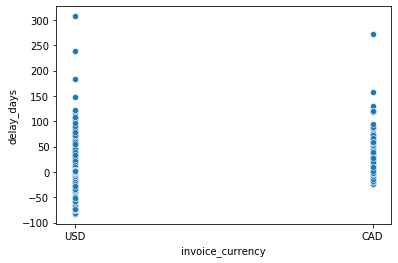

In [30]:
sns.scatterplot(data=X_train.merge(Y_train,on = X_train.index), x="invoice_currency", y="delay_days") 
#Created this graph to find the dependency of Currency type with delay days and we can infer that most of the delay is in the US dollars

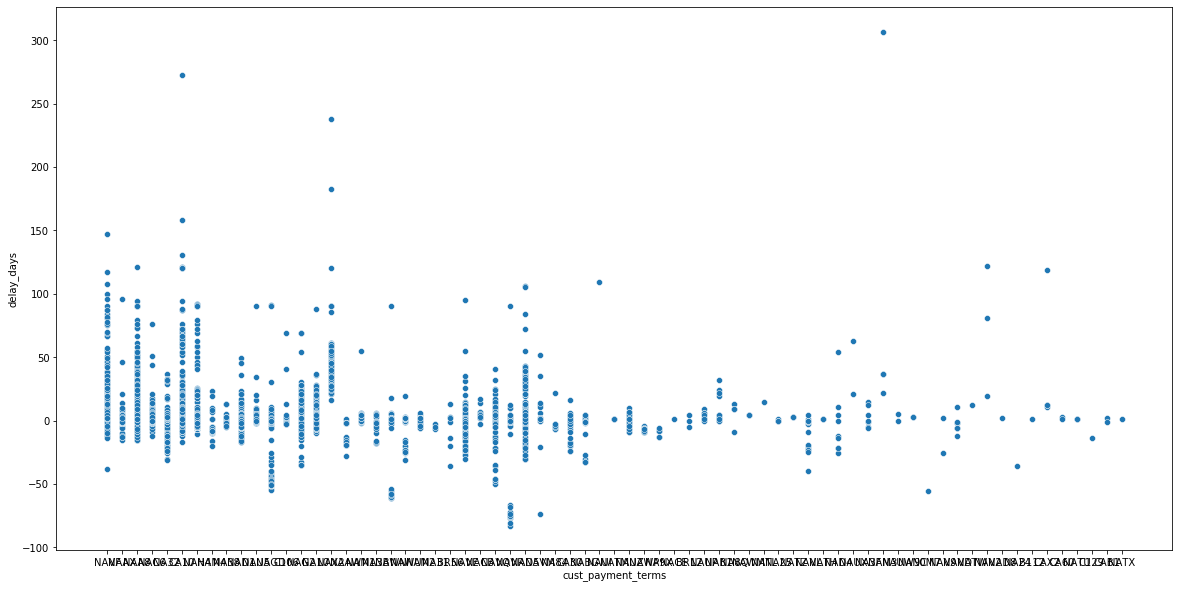

In [31]:
import matplotlib.pyplot as plt

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(20, 10)
sns.scatterplot(data=X_train.merge(Y_train,on = X_train.index), x="cust_payment_terms", y="delay_days")
#Checking if there is any relation of Customer payment terms with the payment being delayed but no such clear inference was found

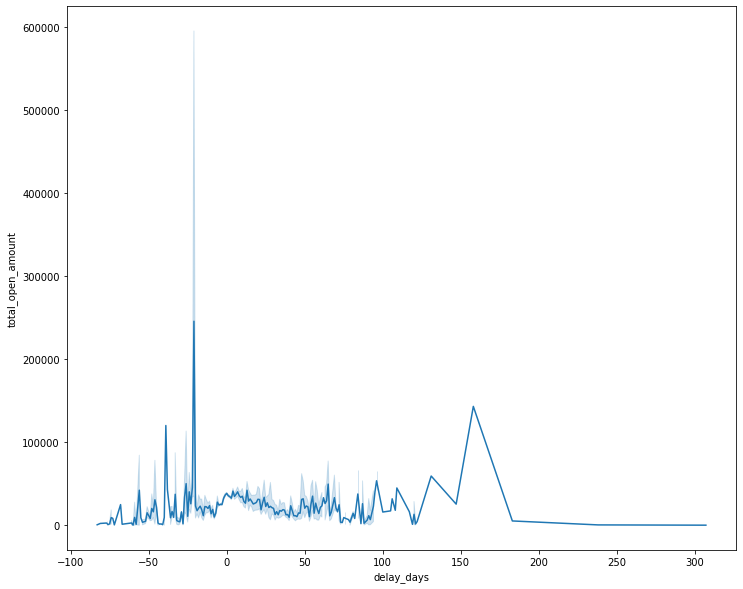

In [32]:
import matplotlib.pyplot as plt

fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 10)
sns.lineplot(data=X_train.merge(Y_train,on = X_train.index), x="delay_days", y="total_open_amount")

#Plotted this lineplot with see the changing nature of delay days with the total amount and we can infer that most of the bigger payments were cleared before the due date

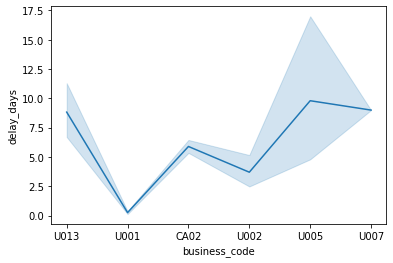

In [33]:
sns.lineplot(data=X_train.merge(Y_train,on = X_train.index), x="business_code", y="delay_days")
#Line plot to check the relation of Business code with delay and we can see that U005 and U013 have the highest delay record

In [34]:
#Finding the companies with their due date having min delay days
X_train.merge(Y_train,on = X_train.index).groupby(['due_in_date','name_customer'])['delay_days'].agg(['min']).unstack().T.idxmin()

due_in_date
2018-10-31        (min, ARMY associates)
2018-12-30            (min, KRAFT F llc)
2018-12-31        (min, KRAFT F systems)
2019-01-01    (min, KRAFT F corporation)
2019-01-04           (min, KRAFT F corp)
                         ...            
2020-04-30          (min, AM foundation)
2020-05-01                 (min, QUI in)
2020-05-20             (min, MASTER llc)
2020-06-06      (min, MASTER associates)
2020-06-10             (min, MASTER llc)
Length: 482, dtype: object

## Feature Engineering

In [35]:
X_train.nunique() #Finding the uniques values of each column 

business_code                 6
cust_number                1227
name_customer              3473
clear_date                  384
posting_date                423
document_create_date.1      423
due_in_date                 482
invoice_currency              2
total_open_amount         27114
baseline_create_date        429
cust_payment_terms           69
dtype: int64

In [36]:
X_train.info()
#method to print information about the X_train dataframe including the index dtype and column dtypes, non-null values and memory usage

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 37512
Data columns (total 11 columns):
business_code             30000 non-null object
cust_number               30000 non-null object
name_customer             30000 non-null object
clear_date                30000 non-null datetime64[ns]
posting_date              30000 non-null datetime64[ns]
document_create_date.1    30000 non-null datetime64[ns]
due_in_date               30000 non-null datetime64[ns]
invoice_currency          30000 non-null object
total_open_amount         30000 non-null float64
baseline_create_date      30000 non-null datetime64[ns]
cust_payment_terms        30000 non-null object
dtypes: datetime64[ns](5), float64(1), object(5)
memory usage: 2.7+ MB


In [37]:
from sklearn.preprocessing import LabelEncoder #Now time for label encoding the columns having object datatype

In [38]:
#Label encoding of name_customer column
label_encoder = LabelEncoder()
X_train['name_customer_enc']= label_encoder.fit_transform(X_train['name_customer'])

X_val['name_customer_enc']= label_encoder.fit_transform(X_val['name_customer'])
X_test['name_customer_enc']= label_encoder.fit_transform(X_test['name_customer'])

In [39]:
#Label encoding of customer number column
X_train['cust_number_enc']= label_encoder.fit_transform(X_train['cust_number'])

X_val['cust_number_enc']= label_encoder.fit_transform(X_val['cust_number'])
X_test['cust_number_enc']= label_encoder.fit_transform(X_test['cust_number'])

In [40]:
#Label encoding of business code column
X_train['business_code_type']= label_encoder.fit_transform(X_train['business_code'])

X_val['business_code_type']= label_encoder.fit_transform(X_val['business_code'])
X_test['business_code_type']= label_encoder.fit_transform(X_test['business_code'])

In [41]:
#Label encoding of invoice currency column
X_train['invoice_currency_enc']= label_encoder.fit_transform(X_train['invoice_currency'])

X_val['invoice_currency_enc']= label_encoder.fit_transform(X_val['invoice_currency'])
X_test['invoice_currency_enc']= label_encoder.fit_transform(X_test['invoice_currency'])

In [42]:
#Label encoding of customer payment terms column
X_train['cust_payment_terms_enc']= label_encoder.fit_transform(X_train['cust_payment_terms'])

X_val['cust_payment_terms_enc']= label_encoder.fit_transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']= label_encoder.fit_transform(X_test['cust_payment_terms'])

In [43]:
X_test[['name_customer_enc','name_customer']] #to verify the encoding

,name_customer_enc,name_customer
43723,519,GROCE systems
43725,1083,SHAM foundation
43726,545,HAR corporation
43728,295,CUSTOM in
43729,49,AM co
...,...,...
49995,1363,WAL-MAR foundation
49996,1361,WAL-MAR corp
49997,980,PUBLI trust
49998,849,MEIJ foundation


In [44]:
X_test[['cust_payment_terms_enc','cust_payment_terms']]

,cust_payment_terms_enc,cust_payment_terms
43723,10,NAA8
43725,10,NAA8
43726,10,NAA8
43728,4,NA10
43729,10,NAA8
...,...,...
49995,22,NAH4
49996,22,NAH4
49997,10,NAA8
49998,10,NAA8


In [45]:
#Now creating a function to drop the columns from Train,Val and Test which are of no use to us now
def drop_columns(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [46]:
X_train ,X_val, X_test = drop_columns(['name_customer'])

In [47]:
X_train ,X_val, X_test = drop_columns(['cust_number'])

In [48]:
X_train ,X_val, X_test = drop_columns(['business_code'])

In [49]:
X_train ,X_val, X_test = drop_columns(['invoice_currency'])

In [50]:
X_train ,X_val, X_test = drop_columns(['cust_payment_terms'])

In [51]:
X_train

,clear_date,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,name_customer_enc,cust_number_enc,business_code_type,invoice_currency_enc,cust_payment_terms_enc
1,2019-06-18,2019-04-15,2019-04-15,2019-05-30,19790.33,2019-04-15,1390,1215,5,1,59
2,2019-09-05,2019-08-22,2019-08-22,2019-09-06,8041.59,2019-08-22,692,841,1,1,24
4,2019-05-13,2019-04-28,2019-04-28,2019-05-13,16158.83,2019-04-28,904,629,1,1,22
5,2019-03-25,2019-03-11,2019-03-11,2019-03-26,64160.98,2019-03-11,2641,821,1,1,27
6,2019-09-10,2019-08-26,2019-08-26,2019-09-27,22180.00,2019-08-26,3148,656,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...
37507,2019-10-11,2019-09-26,2019-09-26,2019-10-11,74373.28,2019-09-26,205,777,1,1,49
37508,2019-02-15,2019-02-01,2019-02-01,2019-02-16,37838.40,2019-02-01,1509,581,1,1,22
37510,2020-01-17,2020-01-03,2020-01-03,2020-01-18,38155.98,2020-01-03,174,805,1,1,22
37511,2020-03-05,2020-02-18,2020-02-18,2020-03-04,4367.35,2020-02-18,3439,631,1,1,22


### Deriving features(day,month and year) from all the dates column

In [52]:
X_train['day_of_document_create_date.1'] = X_train['document_create_date.1'].dt.day
X_train['month_of_document_create_date.1'] = X_train['document_create_date.1'].dt.month
X_train['year_of_document_create_date.1'] = X_train['document_create_date.1'].dt.year

X_val['day_of_document_create_date.1'] = X_val['document_create_date.1'].dt.day
X_val['month_of_document_create_date.1'] = X_val['document_create_date.1'].dt.month
X_val['year_of_document_create_date.1'] = X_val['document_create_date.1'].dt.year


X_test['day_of_document_create_date.1'] = X_test['document_create_date.1'].dt.day
X_test['month_of_document_create_date.1'] = X_test['document_create_date.1'].dt.month
X_test['year_of_document_create_date.1'] = X_test['document_create_date.1'].dt.year

In [53]:
X_train['day_of_baseline_create_date'] = X_train['baseline_create_date'].dt.day
X_train['month_of_baseline_create_date'] = X_train['baseline_create_date'].dt.month
X_train['year_of_baseline_create_date'] = X_train['baseline_create_date'].dt.year

X_val['day_of_baseline_create_date'] = X_val['baseline_create_date'].dt.day
X_val['month_of_baseline_create_date'] = X_val['baseline_create_date'].dt.month
X_val['year_of_baseline_create_date'] = X_val['baseline_create_date'].dt.year


X_test['day_of_baseline_create_date'] = X_test['baseline_create_date'].dt.day
X_test['month_of_baseline_create_date'] = X_test['baseline_create_date'].dt.month
X_test['year_of_baseline_create_date'] = X_test['baseline_create_date'].dt.year

In [54]:
X_train['day_of_posting_date'] = X_train['posting_date'].dt.day
X_train['month_of_posting_date'] = X_train['posting_date'].dt.month
X_train['year_of_posting_date'] = X_train['posting_date'].dt.year

X_val['day_of_posting_date'] = X_val['posting_date'].dt.day
X_val['month_of_posting_date'] = X_val['posting_date'].dt.month
X_val['year_of_posting_date'] = X_val['posting_date'].dt.year


X_test['day_of_posting_date'] = X_test['posting_date'].dt.day
X_test['month_of_posting_date'] = X_test['posting_date'].dt.month
X_test['year_of_posting_date'] = X_test['posting_date'].dt.year

In [55]:
X_train['day_of_due_in_date'] = X_train['due_in_date'].dt.day
X_train['month_of_due_in_datey'] = X_train['due_in_date'].dt.month
X_train['year_of_due_in_date'] = X_train['due_in_date'].dt.year

X_val['day_of_due_in_date'] = X_val['due_in_date'].dt.day
X_val['month_of_due_in_date'] = X_val['due_in_date'].dt.month
X_val['year_of_due_in_date'] = X_val['due_in_date'].dt.year


X_test['day_of_due_in_date'] = X_test['due_in_date'].dt.day
X_test['month_of_due_in_date'] = X_test['due_in_date'].dt.month
X_test['year_of_due_in_date'] = X_test['due_in_date'].dt.year

In [56]:
X_train['day_of_clear_date'] = X_train['clear_date'].dt.day
X_train['month_of_clear_date'] = X_train['clear_date'].dt.month
X_train['year_of_clear_date'] = X_train['clear_date'].dt.year

X_val['day_of_clear_date'] = X_val['clear_date'].dt.day
X_val['month_of_clear_date'] = X_val['clear_date'].dt.month
X_val['year_of_clear_date'] = X_val['clear_date'].dt.year


X_test['day_of_clear_date'] = X_test['clear_date'].dt.day
X_test['month_of_clear_date'] = X_test['clear_date'].dt.month
X_test['year_of_clear_date'] = X_test['clear_date'].dt.year

In [57]:
X_train

,clear_date,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,name_customer_enc,cust_number_enc,business_code_type,invoice_currency_enc,...,year_of_baseline_create_date,day_of_posting_date,month_of_posting_date,year_of_posting_date,day_of_due_in_date,month_of_due_in_datey,year_of_due_in_date,day_of_clear_date,month_of_clear_date,year_of_clear_date
1,2019-06-18,2019-04-15,2019-04-15,2019-05-30,19790.33,2019-04-15,1390,1215,5,1,...,2019,15,4,2019,30,5,2019,18,6,2019
2,2019-09-05,2019-08-22,2019-08-22,2019-09-06,8041.59,2019-08-22,692,841,1,1,...,2019,22,8,2019,6,9,2019,5,9,2019
4,2019-05-13,2019-04-28,2019-04-28,2019-05-13,16158.83,2019-04-28,904,629,1,1,...,2019,28,4,2019,13,5,2019,13,5,2019
5,2019-03-25,2019-03-11,2019-03-11,2019-03-26,64160.98,2019-03-11,2641,821,1,1,...,2019,11,3,2019,26,3,2019,25,3,2019
6,2019-09-10,2019-08-26,2019-08-26,2019-09-27,22180.00,2019-08-26,3148,656,1,1,...,2019,26,8,2019,27,9,2019,10,9,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37507,2019-10-11,2019-09-26,2019-09-26,2019-10-11,74373.28,2019-09-26,205,777,1,1,...,2019,26,9,2019,11,10,2019,11,10,2019
37508,2019-02-15,2019-02-01,2019-02-01,2019-02-16,37838.40,2019-02-01,1509,581,1,1,...,2019,1,2,2019,16,2,2019,15,2,2019
37510,2020-01-17,2020-01-03,2020-01-03,2020-01-18,38155.98,2020-01-03,174,805,1,1,...,2020,3,1,2020,18,1,2020,17,1,2020
37511,2020-03-05,2020-02-18,2020-02-18,2020-03-04,4367.35,2020-02-18,3439,631,1,1,...,2020,18,2,2020,4,3,2020,5,3,2020


In [58]:
#Dropping the unnecessary columns
X_train ,X_val, X_test = drop_columns(['posting_date','document_create_date.1','baseline_create_date','due_in_date','clear_date'])

In [59]:
X_train ,X_val, X_test = drop_columns(['day_of_clear_date','month_of_clear_date','year_of_clear_date'])

In [60]:
X_train

,total_open_amount,name_customer_enc,cust_number_enc,business_code_type,invoice_currency_enc,cust_payment_terms_enc,day_of_document_create_date.1,month_of_document_create_date.1,year_of_document_create_date.1,day_of_baseline_create_date,month_of_baseline_create_date,year_of_baseline_create_date,day_of_posting_date,month_of_posting_date,year_of_posting_date,day_of_due_in_date,month_of_due_in_datey,year_of_due_in_date
1,19790.33,1390,1215,5,1,59,15,4,2019,15,4,2019,15,4,2019,30,5,2019
2,8041.59,692,841,1,1,24,22,8,2019,22,8,2019,22,8,2019,6,9,2019
4,16158.83,904,629,1,1,22,28,4,2019,28,4,2019,28,4,2019,13,5,2019
5,64160.98,2641,821,1,1,27,11,3,2019,11,3,2019,11,3,2019,26,3,2019
6,22180.00,3148,656,1,1,15,26,8,2019,26,8,2019,26,8,2019,27,9,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37507,74373.28,205,777,1,1,49,26,9,2019,26,9,2019,26,9,2019,11,10,2019
37508,37838.40,1509,581,1,1,22,1,2,2019,1,2,2019,1,2,2019,16,2,2019
37510,38155.98,174,805,1,1,22,3,1,2020,3,1,2020,3,1,2020,18,1,2020
37511,4367.35,3439,631,1,1,22,18,2,2020,18,2,2020,18,2,2020,4,3,2020


### Milestone 3

## Feature Selection

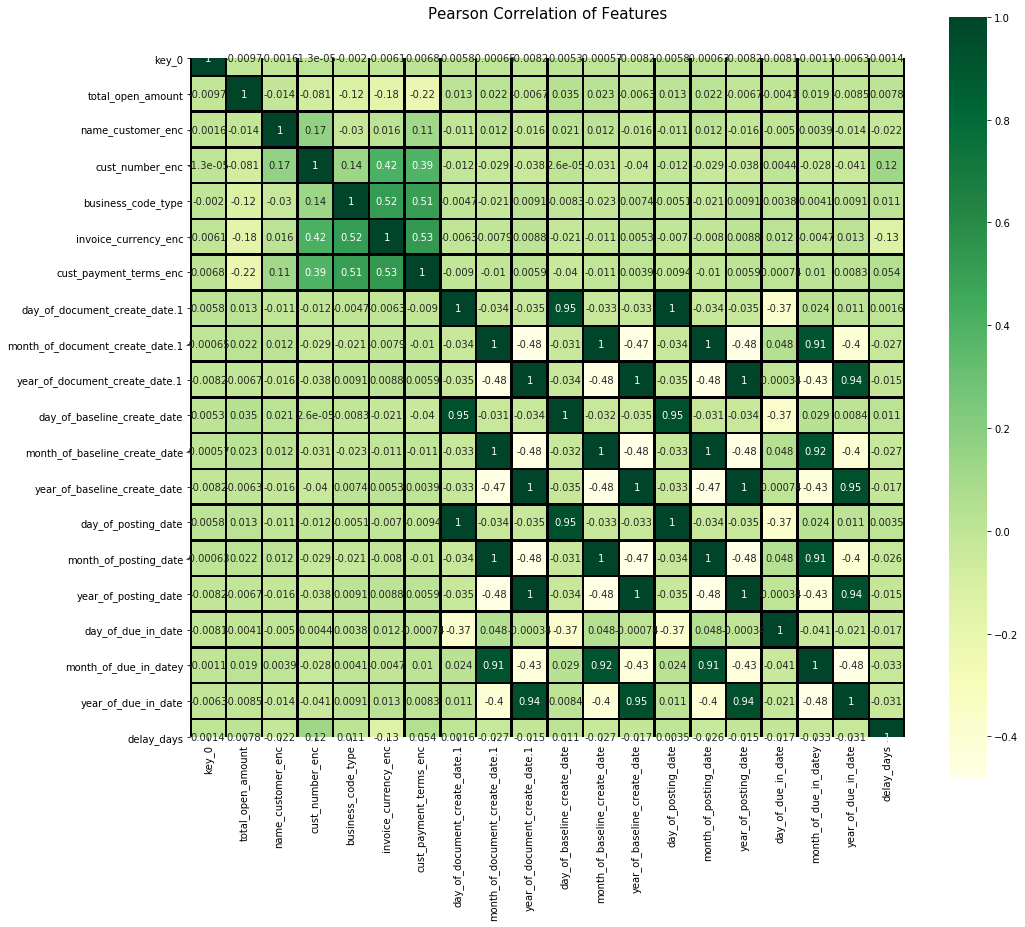

In [61]:
#Checking the coorelation using heatmap between all the columns of the dataframe X_train merged with Y_train
colormap = plt.cm.YlGn
plt.figure(figsize=(16,14))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(Y_train , on = X_train.index ).corr(),linewidths=1.5,vmax=1.0, 
            square=True, cmap=colormap, linecolor='black', annot=True)

In [62]:
#Here we did not find any constant or unnecessary columns so we are going ahead with all the columns remaining 

In [63]:
X_train.dtypes 
#Checking the datatypes and ensuring that the all the columns are in int or float before going to modelling phase

total_open_amount                  float64
name_customer_enc                    int32
cust_number_enc                      int32
business_code_type                   int32
invoice_currency_enc                 int32
cust_payment_terms_enc               int32
day_of_document_create_date.1        int64
month_of_document_create_date.1      int64
year_of_document_create_date.1       int64
day_of_baseline_create_date          int64
month_of_baseline_create_date        int64
year_of_baseline_create_date         int64
day_of_posting_date                  int64
month_of_posting_date                int64
year_of_posting_date                 int64
day_of_due_in_date                   int64
month_of_due_in_datey                int64
year_of_due_in_date                  int64
dtype: object

In [64]:
X_train

,total_open_amount,name_customer_enc,cust_number_enc,business_code_type,invoice_currency_enc,cust_payment_terms_enc,day_of_document_create_date.1,month_of_document_create_date.1,year_of_document_create_date.1,day_of_baseline_create_date,month_of_baseline_create_date,year_of_baseline_create_date,day_of_posting_date,month_of_posting_date,year_of_posting_date,day_of_due_in_date,month_of_due_in_datey,year_of_due_in_date
1,19790.33,1390,1215,5,1,59,15,4,2019,15,4,2019,15,4,2019,30,5,2019
2,8041.59,692,841,1,1,24,22,8,2019,22,8,2019,22,8,2019,6,9,2019
4,16158.83,904,629,1,1,22,28,4,2019,28,4,2019,28,4,2019,13,5,2019
5,64160.98,2641,821,1,1,27,11,3,2019,11,3,2019,11,3,2019,26,3,2019
6,22180.00,3148,656,1,1,15,26,8,2019,26,8,2019,26,8,2019,27,9,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37507,74373.28,205,777,1,1,49,26,9,2019,26,9,2019,26,9,2019,11,10,2019
37508,37838.40,1509,581,1,1,22,1,2,2019,1,2,2019,1,2,2019,16,2,2019
37510,38155.98,174,805,1,1,22,3,1,2020,3,1,2020,3,1,2020,18,1,2020
37511,4367.35,3439,631,1,1,22,18,2,2020,18,2,2020,18,2,2020,4,3,2020


## Modelling

### Linear Regression

In [65]:
#creating base model
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, Y_train) 

LinearRegression()

In [66]:
Y_predict = base_model.predict(X_val) 

In [67]:
Y_predict

array([ 3.69680293, -0.5679922 , -3.21401108, ...,  9.06421731,
       -3.39839685, -3.89004678])

In [68]:
from sklearn.metrics import mean_squared_error



In [69]:
mean_squared_error(Y_val, Y_predict, squared=False) #Checking the RMSE value for this model

11.98016357046062

In [70]:
mean_squared_error(Y_val,Y_predict)# MSE

143.52431917499175

In [71]:
merged = pd.DataFrame(zip(Y_predict , Y_val),columns=['Predicted','Actuals'])

In [72]:
merged #Comparing the Predicted values with the original ones

,Predicted,Actuals
0,3.696803,2.0
1,-0.567992,3.0
2,-3.214011,2.0
3,-2.716234,0.0
4,-1.359264,-4.0
...,...,...
4995,-1.522255,-4.0
4996,-1.634554,-3.0
4997,9.064217,56.0
4998,-3.398397,0.0


### Decision Tree Regression

In [73]:
from sklearn.tree import DecisionTreeRegressor #Tree based model
regressor = DecisionTreeRegressor(random_state=0 , max_depth=4,splitter='random',max_features='auto') 
#Choosing the hyperparameter values

In [74]:
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=4, max_features='auto', random_state=0,
                      splitter='random')

In [75]:
Y_predict2 = regressor.predict(X_val)

In [76]:
mean_squared_error(Y_val, Y_predict2, squared=False) #RMSE value

12.16127408198601

In [77]:
mean_squared_error(Y_val, Y_predict2)

147.89658729718468

In [78]:
mergedtwo = pd.DataFrame(zip(Y_predict2 , Y_val),columns=['Predictednew','Actualsnew'])


In [79]:
mergedtwo #Comparing values

,Predictednew,Actualsnew
0,4.246518,2.0
1,0.711965,3.0
2,0.711965,2.0
3,0.711965,0.0
4,0.711965,-4.0
...,...,...
4995,0.711965,-4.0
4996,0.711965,-3.0
4997,-2.549567,56.0
4998,0.711965,0.0


### Random Forest Regression

In [80]:
from sklearn.ensemble import RandomForestRegressor
newreg=RandomForestRegressor(max_depth=2, random_state=0) #Trying to choose the optimal hyperparameters


In [81]:
newreg.fit(X_train, Y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [82]:
Y_predict3 = newreg.predict(X_val)

In [83]:
mean_squared_error(Y_val, Y_predict3, squared=False) #The RMSE value

12.220075497034273

### XGBoost Algorithm

In [84]:
from xgboost import XGBRegressor #boosting library
from sklearn.model_selection import cross_val_score

In [85]:
xgb=XGBRegressor(verbosity=0,max_depth=5)  #verbosity 0 for silence and bydefault booster=gbtree

In [86]:
xgb.fit(X_train,Y_train)
score=xgb.score(X_train,Y_train) #Checking score

In [87]:
print(score)

0.7242904830793461


In [88]:
#Evaluating the model using the cross validation scheme
cv=cross_val_score(xgb,X_train,Y_train)
print(cv.mean())


0.4917815082479729


In [89]:
Y_predict4=xgb.predict(X_val)

In [90]:
rmse = np.sqrt(mean_squared_error(Y_val, Y_predict4))

In [91]:
print(rmse)

13.350260137229425


In [92]:
# RMSE values of different models
#Linear Regression: 11.98
#Decision Tree Regression: 12.16
#Random Forest Regression :12.22
#XGBoost: 13.35
#Hence we infer that Linear Regression model is working better

# Work on Main Test data with null clear date

In [93]:
#Here also we will follow the same flow of processes that we did in the Train dataset except EDA because that is done only in Train set

#we have to bring the main_test in same format as that of the X_train

In [94]:
main_test.isna().sum() #Check again if clear dates are all none

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             10000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

In [95]:
main_test.dtypes #Checking the datatypes of columns

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

## Data Prepocessing

In [96]:
# Convert to datetime format
main_test['document_create_date.1']=pd.to_datetime(main_test['document_create_date.1'], format='%Y%m%d')
main_test['due_in_date']=pd.to_datetime(main_test.due_in_date,format='%Y%m%d')
main_test['posting_date']=pd.to_datetime(main_test['posting_date'], format='%Y %m %d')
main_test['baseline_create_date']=pd.to_datetime(main_test.baseline_create_date,format='%Y%m%d')

main_test.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                        object
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date               int64
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
area_business                    float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

In [97]:
#Dropping the unnecessary columns and assigning it to a new dataframe
newmain_test=main_test.drop(['area_business','posting_id','document type','invoice_id','document_create_date','doc_id','isOpen','buisness_year'],axis=1)

In [98]:
newmain_test

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,CA02,0140104225,SAVE-ON- systems,NaN,2020-04-16,2020-04-16,2020-04-27,CAD,99601.96,2020-04-17,CA10
3,U001,0200769623,WAL-MAR associates,NaN,2020-03-21,2020-03-21,2020-04-05,USD,6807.61,2020-03-21,NAH4
7,U001,0200759878,SA trust,NaN,2020-05-05,2020-05-05,2020-05-20,USD,27612.88,2020-05-05,NAH4
8,U001,0200761734,H E BUT llc,NaN,2020-04-16,2020-04-16,2020-05-01,USD,14962.63,2020-04-16,NAA8
13,U001,0200794332,COST associates,NaN,2020-03-17,2020-03-17,2020-04-01,USD,17221.02,2020-03-17,NAAX
...,...,...,...,...,...,...,...,...,...,...,...
49960,U001,0200769623,WAL-MAR corporation,NaN,2020-04-16,2020-04-16,2020-05-01,USD,2263.22,2020-04-16,NAH4
49971,U001,0200793088,DEMOU llc,NaN,2020-05-07,2020-05-07,2020-05-22,USD,42517.77,2020-05-07,NAA8
49972,U001,0200769623,WAL-MAR associates,NaN,2020-04-07,2020-04-07,2020-04-22,USD,47952.44,2020-04-07,NAH4
49981,CA02,0140104409,LOB foundation,NaN,2020-04-05,2020-04-05,2020-04-17,CAD,36790.01,2020-04-07,CA10


In [99]:
newmain_test.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                        object
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
dtype: object

## Feature Engineering

In [100]:
#Here also we have to do the similar label encoding part
label_encoder = LabelEncoder()

In [101]:
newmain_test['name_customer_enc']= label_encoder.fit_transform(newmain_test['name_customer'])
newmain_test['cust_number_enc']= label_encoder.fit_transform(newmain_test['cust_number'])
newmain_test['business_code_type']= label_encoder.fit_transform(newmain_test['business_code'])
newmain_test['invoice_currency_enc']= label_encoder.fit_transform(newmain_test['invoice_currency'])
newmain_test['cust_payment_terms_enc']= label_encoder.fit_transform(newmain_test['cust_payment_terms'])


In [102]:
newmain_test.dtypes 

business_code                     object
cust_number                       object
name_customer                     object
clear_date                        object
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
name_customer_enc                  int32
cust_number_enc                    int32
business_code_type                 int32
invoice_currency_enc               int32
cust_payment_terms_enc             int32
dtype: object

In [103]:
#Drop the columns from which we have encoded values,i.e. the columns having object datatype
newmain_test=newmain_test.drop(['cust_number','name_customer','cust_payment_terms','invoice_currency','business_code'],axis=1)

In [104]:
newmain_test

,clear_date,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,name_customer_enc,cust_number_enc,business_code_type,invoice_currency_enc,cust_payment_terms_enc
0,NaN,2020-04-16,2020-04-16,2020-04-27,99601.96,2020-04-17,1357,126,0,0,4
3,NaN,2020-03-21,2020-03-21,2020-04-05,6807.61,2020-03-21,1694,396,1,1,28
7,NaN,2020-05-05,2020-05-05,2020-05-20,27612.88,2020-05-05,1329,376,1,1,28
8,NaN,2020-04-16,2020-04-16,2020-05-01,14962.63,2020-04-16,663,380,1,1,13
13,NaN,2020-03-17,2020-03-17,2020-04-01,17221.02,2020-03-17,354,449,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...
49960,NaN,2020-04-16,2020-04-16,2020-05-01,2263.22,2020-04-16,1697,396,1,1,28
49971,NaN,2020-05-07,2020-05-07,2020-05-22,42517.77,2020-05-07,433,442,1,1,13
49972,NaN,2020-04-07,2020-04-07,2020-04-22,47952.44,2020-04-07,1694,396,1,1,28
49981,NaN,2020-04-05,2020-04-05,2020-04-17,36790.01,2020-04-07,933,138,0,0,4


In [105]:
newmain_test.dtypes

clear_date                        object
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
total_open_amount                float64
baseline_create_date      datetime64[ns]
name_customer_enc                  int32
cust_number_enc                    int32
business_code_type                 int32
invoice_currency_enc               int32
cust_payment_terms_enc             int32
dtype: object

In [106]:
#datetime conversion in newmain test dataframe
newmain_test['document_create_date.1']=pd.to_datetime(newmain_test['document_create_date.1'], format='%Y%m%d')
newmain_test['due_in_date']=pd.to_datetime(newmain_test.due_in_date,format='%Y%m%d')
newmain_test['posting_date']=pd.to_datetime(newmain_test['posting_date'], format='%Y %m %d')
newmain_test['baseline_create_date']=pd.to_datetime(newmain_test.baseline_create_date,format='%Y%m%d')

newmain_test.dtypes

clear_date                        object
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
total_open_amount                float64
baseline_create_date      datetime64[ns]
name_customer_enc                  int32
cust_number_enc                    int32
business_code_type                 int32
invoice_currency_enc               int32
cust_payment_terms_enc             int32
dtype: object

In [107]:
# Deriving day,month and year from all the dates columns

In [108]:
newmain_test['day_of_document_create_date.1'] = newmain_test['document_create_date.1'].dt.day
newmain_test['month_of_document_create_date.1'] = newmain_test['document_create_date.1'].dt.month
newmain_test['year_of_document_create_date.1'] = newmain_test['document_create_date.1'].dt.year

In [109]:
newmain_test['day_of_baseline_create_date'] = newmain_test['baseline_create_date'].dt.day
newmain_test['month_of_baseline_create_date'] = newmain_test['baseline_create_date'].dt.month
newmain_test['year_of_baseline_create_date'] = newmain_test['baseline_create_date'].dt.year

In [110]:
newmain_test['day_of_posting_date'] = newmain_test['posting_date'].dt.day
newmain_test['month_of_posting_date'] = newmain_test['posting_date'].dt.month
newmain_test['year_of_posting_date'] = newmain_test['posting_date'].dt.year

In [111]:
newmain_test['day_of_due_in_date'] = newmain_test['due_in_date'].dt.day
newmain_test['month_of_due_in_datey'] = newmain_test['due_in_date'].dt.month
newmain_test['year_of_due_in_date'] = newmain_test['due_in_date'].dt.year

In [112]:
newmain_test=newmain_test.drop(['due_in_date','document_create_date.1','baseline_create_date','posting_date','clear_date'],axis=1)

In [113]:
newmain_test

,total_open_amount,name_customer_enc,cust_number_enc,business_code_type,invoice_currency_enc,cust_payment_terms_enc,day_of_document_create_date.1,month_of_document_create_date.1,year_of_document_create_date.1,day_of_baseline_create_date,month_of_baseline_create_date,year_of_baseline_create_date,day_of_posting_date,month_of_posting_date,year_of_posting_date,day_of_due_in_date,month_of_due_in_datey,year_of_due_in_date
0,99601.96,1357,126,0,0,4,16,4,2020,17,4,2020,16,4,2020,27,4,2020
3,6807.61,1694,396,1,1,28,21,3,2020,21,3,2020,21,3,2020,5,4,2020
7,27612.88,1329,376,1,1,28,5,5,2020,5,5,2020,5,5,2020,20,5,2020
8,14962.63,663,380,1,1,13,16,4,2020,16,4,2020,16,4,2020,1,5,2020
13,17221.02,354,449,1,1,15,17,3,2020,17,3,2020,17,3,2020,1,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49960,2263.22,1697,396,1,1,28,16,4,2020,16,4,2020,16,4,2020,1,5,2020
49971,42517.77,433,442,1,1,13,7,5,2020,7,5,2020,7,5,2020,22,5,2020
49972,47952.44,1694,396,1,1,28,7,4,2020,7,4,2020,7,4,2020,22,4,2020
49981,36790.01,933,138,0,0,4,5,4,2020,7,4,2020,5,4,2020,17,4,2020


In [114]:
X_train

,total_open_amount,name_customer_enc,cust_number_enc,business_code_type,invoice_currency_enc,cust_payment_terms_enc,day_of_document_create_date.1,month_of_document_create_date.1,year_of_document_create_date.1,day_of_baseline_create_date,month_of_baseline_create_date,year_of_baseline_create_date,day_of_posting_date,month_of_posting_date,year_of_posting_date,day_of_due_in_date,month_of_due_in_datey,year_of_due_in_date
1,19790.33,1390,1215,5,1,59,15,4,2019,15,4,2019,15,4,2019,30,5,2019
2,8041.59,692,841,1,1,24,22,8,2019,22,8,2019,22,8,2019,6,9,2019
4,16158.83,904,629,1,1,22,28,4,2019,28,4,2019,28,4,2019,13,5,2019
5,64160.98,2641,821,1,1,27,11,3,2019,11,3,2019,11,3,2019,26,3,2019
6,22180.00,3148,656,1,1,15,26,8,2019,26,8,2019,26,8,2019,27,9,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37507,74373.28,205,777,1,1,49,26,9,2019,26,9,2019,26,9,2019,11,10,2019
37508,37838.40,1509,581,1,1,22,1,2,2019,1,2,2019,1,2,2019,16,2,2019
37510,38155.98,174,805,1,1,22,3,1,2020,3,1,2020,3,1,2020,18,1,2020
37511,4367.35,3439,631,1,1,22,18,2,2020,18,2,2020,18,2,2020,4,3,2020


In [115]:
newmain_test.dtypes #Now finally checking the datatype of newmain test dataset

total_open_amount                  float64
name_customer_enc                    int32
cust_number_enc                      int32
business_code_type                   int32
invoice_currency_enc                 int32
cust_payment_terms_enc               int32
day_of_document_create_date.1        int64
month_of_document_create_date.1      int64
year_of_document_create_date.1       int64
day_of_baseline_create_date          int64
month_of_baseline_create_date        int64
year_of_baseline_create_date         int64
day_of_posting_date                  int64
month_of_posting_date                int64
year_of_posting_date                 int64
day_of_due_in_date                   int64
month_of_due_in_datey                int64
year_of_due_in_date                  int64
dtype: object

In [116]:
X_train.dtypes #Comparing the datatypes with test dataframe

total_open_amount                  float64
name_customer_enc                    int32
cust_number_enc                      int32
business_code_type                   int32
invoice_currency_enc                 int32
cust_payment_terms_enc               int32
day_of_document_create_date.1        int64
month_of_document_create_date.1      int64
year_of_document_create_date.1       int64
day_of_baseline_create_date          int64
month_of_baseline_create_date        int64
year_of_baseline_create_date         int64
day_of_posting_date                  int64
month_of_posting_date                int64
year_of_posting_date                 int64
day_of_due_in_date                   int64
month_of_due_in_datey                int64
year_of_due_in_date                  int64
dtype: object

## Final Prediction

In [117]:
finalnew=base_model.predict(newmain_test) #Using the linear regression model

In [118]:
finalnew=pd.Series(finalnew,name='delay_days') #Pandas Series for one-dimensional labeled array

In [119]:
finalnew

0       4.159410
1      -1.909980
2      -2.649283
3      -3.984035
4      -2.387607
          ...   
9995   -2.272876
9996   -3.768352
9997   -2.715195
9998    4.652335
9999   -7.206828
Name: delay_days, Length: 10000, dtype: float64

In [120]:
finalnew=finalnew.round(0).astype(int) #Covert the delay days to int and rounding off

In [121]:
main_test.reset_index(drop=True,inplace=True) #resetting the index of main test so that we can merge the delay series with it

In [122]:
Final = main_test.merge(finalnew , on = newmain_test.index ) #Merging main test with new main test
Final #Finally we have predicted the delay days and inserted it into the dataframe

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,...,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay_days
0,0,CA02,0140104225,SAVE-ON- systems,NaN,2020.0,2.960629e+09,2020-04-16,20200416,2020-04-16,...,CAD,RV,1.0,NaN,99601.96,2020-04-17,CA10,2.960629e+09,1,4
1,3,U001,0200769623,WAL-MAR associates,NaN,2020.0,1.930682e+09,2020-03-21,20200321,2020-03-21,...,USD,RV,1.0,NaN,6807.61,2020-03-21,NAH4,1.930682e+09,1,-2
2,7,U001,0200759878,SA trust,NaN,2020.0,1.930848e+09,2020-05-05,20200502,2020-05-05,...,USD,RV,1.0,NaN,27612.88,2020-05-05,NAH4,1.930848e+09,1,-3
3,8,U001,0200761734,H E BUT llc,NaN,2020.0,1.930795e+09,2020-04-16,20200416,2020-04-16,...,USD,RV,1.0,NaN,14962.63,2020-04-16,NAA8,1.930795e+09,1,-4
4,13,U001,0200794332,COST associates,NaN,2020.0,1.930661e+09,2020-03-17,20200317,2020-03-17,...,USD,RV,1.0,NaN,17221.02,2020-03-17,NAAX,1.930661e+09,1,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49960,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930793e+09,2020-04-16,20200415,2020-04-16,...,USD,RV,1.0,NaN,2263.22,2020-04-16,NAH4,1.930793e+09,1,-2
9996,49971,U001,0200793088,DEMOU llc,NaN,2020.0,1.930860e+09,2020-05-07,20200506,2020-05-07,...,USD,RV,1.0,NaN,42517.77,2020-05-07,NAA8,1.930860e+09,1,-4
9997,49972,U001,0200769623,WAL-MAR associates,NaN,2020.0,1.930752e+09,2020-04-07,20200405,2020-04-07,...,USD,RV,1.0,NaN,47952.44,2020-04-07,NAH4,1.930752e+09,1,-3
9998,49981,CA02,0140104409,LOB foundation,NaN,2020.0,2.960625e+09,2020-04-05,20200405,2020-04-05,...,CAD,RV,1.0,NaN,36790.01,2020-04-07,CA10,2.960625e+09,1,5


In [123]:
Final.dtypes

key_0                              int64
business_code                     object
cust_number                       object
name_customer                     object
clear_date                        object
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date               int64
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
area_business                    float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
delay_days                         int32
dtype: object

In [124]:
Final['delay_days']=Final['delay_days']*np.timedelta64(1,'D') 
#Now converting the delay days to timedelta form to add it with due date

In [125]:
Final['predicted_payment_date']=Final['delay_days']+Final['due_in_date'] 
#Creating predicted payment date by addition of delay days and due in date and inserting the column into the Final dataframe

In [126]:
Final=Final.drop(['clear_date'],axis=1)
#Since we have renamed clear date as predicted payment date and it is null now,so drop it

In [127]:
Final #Final dataframe with predicted payment date and delay days

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay_days,predicted_payment_date
0,0,CA02,0140104225,SAVE-ON- systems,2020.0,2.960629e+09,2020-04-16,20200416,2020-04-16,2020-04-27,...,RV,1.0,NaN,99601.96,2020-04-17,CA10,2.960629e+09,1,4 days,2020-05-01
1,3,U001,0200769623,WAL-MAR associates,2020.0,1.930682e+09,2020-03-21,20200321,2020-03-21,2020-04-05,...,RV,1.0,NaN,6807.61,2020-03-21,NAH4,1.930682e+09,1,-2 days,2020-04-03
2,7,U001,0200759878,SA trust,2020.0,1.930848e+09,2020-05-05,20200502,2020-05-05,2020-05-20,...,RV,1.0,NaN,27612.88,2020-05-05,NAH4,1.930848e+09,1,-3 days,2020-05-17
3,8,U001,0200761734,H E BUT llc,2020.0,1.930795e+09,2020-04-16,20200416,2020-04-16,2020-05-01,...,RV,1.0,NaN,14962.63,2020-04-16,NAA8,1.930795e+09,1,-4 days,2020-04-27
4,13,U001,0200794332,COST associates,2020.0,1.930661e+09,2020-03-17,20200317,2020-03-17,2020-04-01,...,RV,1.0,NaN,17221.02,2020-03-17,NAAX,1.930661e+09,1,-2 days,2020-03-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49960,U001,0200769623,WAL-MAR corporation,2020.0,1.930793e+09,2020-04-16,20200415,2020-04-16,2020-05-01,...,RV,1.0,NaN,2263.22,2020-04-16,NAH4,1.930793e+09,1,-2 days,2020-04-29
9996,49971,U001,0200793088,DEMOU llc,2020.0,1.930860e+09,2020-05-07,20200506,2020-05-07,2020-05-22,...,RV,1.0,NaN,42517.77,2020-05-07,NAA8,1.930860e+09,1,-4 days,2020-05-18
9997,49972,U001,0200769623,WAL-MAR associates,2020.0,1.930752e+09,2020-04-07,20200405,2020-04-07,2020-04-22,...,RV,1.0,NaN,47952.44,2020-04-07,NAH4,1.930752e+09,1,-3 days,2020-04-19
9998,49981,CA02,0140104409,LOB foundation,2020.0,2.960625e+09,2020-04-05,20200405,2020-04-05,2020-04-17,...,RV,1.0,NaN,36790.01,2020-04-07,CA10,2.960625e+09,1,5 days,2020-04-22


In [128]:
Final.dtypes #Checking the datatypes of the columns of Final Dataframe

key_0                               int64
business_code                      object
cust_number                        object
name_customer                      object
buisness_year                     float64
doc_id                            float64
posting_date               datetime64[ns]
document_create_date                int64
document_create_date.1     datetime64[ns]
due_in_date                datetime64[ns]
invoice_currency                   object
document type                      object
posting_id                        float64
area_business                     float64
total_open_amount                 float64
baseline_create_date       datetime64[ns]
cust_payment_terms                 object
invoice_id                        float64
isOpen                              int64
delay_days                timedelta64[ns]
predicted_payment_date     datetime64[ns]
dtype: object

In [129]:
Final.describe() #Statistical summary

,key_0,buisness_year,doc_id,document_create_date,posting_id,area_business,total_open_amount,invoice_id,isOpen,delay_days
count,10000.000000,10000.0,1.000000e+04,1.000000e+04,10000.0,0.0,10000.000000,1.000000e+04,10000.0,10000
mean,25064.397600,2020.0,2.004991e+09,2.020037e+07,1.0,NaN,32366.990861,2.004991e+09,1.0,-4 days +14:43:17.760000
std,14394.702199,0.0,2.654605e+08,6.949423e+01,0.0,NaN,36093.015637,2.654605e+08,0.0,3 days 20:16:00.734172
min,0.000000,2020.0,1.930540e+09,2.020022e+07,1.0,NaN,1.170000,1.930540e+09,1.0,-37 days +00:00:00
25%,12621.000000,2020.0,1.930658e+09,2.020031e+07,1.0,NaN,5655.940000,1.930658e+09,1.0,-5 days +00:00:00
50%,24992.500000,2020.0,1.930730e+09,2.020033e+07,1.0,NaN,18472.290000,1.930730e+09,1.0,-3 days +00:00:00
75%,37464.250000,2020.0,1.930815e+09,2.020042e+07,1.0,NaN,48622.127500,1.930815e+09,1.0,-2 days +00:00:00
max,49984.000000,2020.0,2.960636e+09,2.020052e+07,1.0,NaN,451664.910000,2.960636e+09,1.0,14 days 00:00:00


In [130]:
Final['delay_days'] = Final['delay_days'].dt.days.astype('int16') 
# Now again we have to convert delay_days to int as we need to use it for bucketting

In [131]:
Final.dtypes #Verifying the datatypes

key_0                              int64
business_code                     object
cust_number                       object
name_customer                     object
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date               int64
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
area_business                    float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
delay_days                         int16
predicted_payment_date    datetime64[ns]
dtype: object

In [132]:
Final

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay_days,predicted_payment_date
0,0,CA02,0140104225,SAVE-ON- systems,2020.0,2.960629e+09,2020-04-16,20200416,2020-04-16,2020-04-27,...,RV,1.0,NaN,99601.96,2020-04-17,CA10,2.960629e+09,1,4,2020-05-01
1,3,U001,0200769623,WAL-MAR associates,2020.0,1.930682e+09,2020-03-21,20200321,2020-03-21,2020-04-05,...,RV,1.0,NaN,6807.61,2020-03-21,NAH4,1.930682e+09,1,-2,2020-04-03
2,7,U001,0200759878,SA trust,2020.0,1.930848e+09,2020-05-05,20200502,2020-05-05,2020-05-20,...,RV,1.0,NaN,27612.88,2020-05-05,NAH4,1.930848e+09,1,-3,2020-05-17
3,8,U001,0200761734,H E BUT llc,2020.0,1.930795e+09,2020-04-16,20200416,2020-04-16,2020-05-01,...,RV,1.0,NaN,14962.63,2020-04-16,NAA8,1.930795e+09,1,-4,2020-04-27
4,13,U001,0200794332,COST associates,2020.0,1.930661e+09,2020-03-17,20200317,2020-03-17,2020-04-01,...,RV,1.0,NaN,17221.02,2020-03-17,NAAX,1.930661e+09,1,-2,2020-03-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49960,U001,0200769623,WAL-MAR corporation,2020.0,1.930793e+09,2020-04-16,20200415,2020-04-16,2020-05-01,...,RV,1.0,NaN,2263.22,2020-04-16,NAH4,1.930793e+09,1,-2,2020-04-29
9996,49971,U001,0200793088,DEMOU llc,2020.0,1.930860e+09,2020-05-07,20200506,2020-05-07,2020-05-22,...,RV,1.0,NaN,42517.77,2020-05-07,NAA8,1.930860e+09,1,-4,2020-05-18
9997,49972,U001,0200769623,WAL-MAR associates,2020.0,1.930752e+09,2020-04-07,20200405,2020-04-07,2020-04-22,...,RV,1.0,NaN,47952.44,2020-04-07,NAH4,1.930752e+09,1,-3,2020-04-19
9998,49981,CA02,0140104409,LOB foundation,2020.0,2.960625e+09,2020-04-05,20200405,2020-04-05,2020-04-17,...,RV,1.0,NaN,36790.01,2020-04-07,CA10,2.960625e+09,1,5,2020-04-22


In [133]:
#Creating bins in the range of 15 i.e -30 to -15,-15 to 0,0 to 15,15-30....
bins = [-30,-15,0, 15, 30, 45, 60]
Final['delay_buckets'] = pd.cut(Final['delay_days'],bins)
print(Final)

      key_0 business_code cust_number        name_customer  buisness_year  \
0         0          CA02  0140104225     SAVE-ON- systems         2020.0   
1         3          U001  0200769623   WAL-MAR associates         2020.0   
2         7          U001  0200759878             SA trust         2020.0   
3         8          U001  0200761734          H E BUT llc         2020.0   
4        13          U001  0200794332      COST associates         2020.0   
...     ...           ...         ...                  ...            ...   
9995  49960          U001  0200769623  WAL-MAR corporation         2020.0   
9996  49971          U001  0200793088            DEMOU llc         2020.0   
9997  49972          U001  0200769623   WAL-MAR associates         2020.0   
9998  49981          CA02  0140104409       LOB foundation         2020.0   
9999  49984          U001  0100004744             J & J co         2020.0   

            doc_id posting_date  document_create_date document_create_date.

### Final Dataframe with Predicted payment date and Delay buckets

In [134]:
Final

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay_days,predicted_payment_date,delay_buckets
0,0,CA02,0140104225,SAVE-ON- systems,2020.0,2.960629e+09,2020-04-16,20200416,2020-04-16,2020-04-27,...,1.0,NaN,99601.96,2020-04-17,CA10,2.960629e+09,1,4,2020-05-01,"(0, 15]"
1,3,U001,0200769623,WAL-MAR associates,2020.0,1.930682e+09,2020-03-21,20200321,2020-03-21,2020-04-05,...,1.0,NaN,6807.61,2020-03-21,NAH4,1.930682e+09,1,-2,2020-04-03,"(-15, 0]"
2,7,U001,0200759878,SA trust,2020.0,1.930848e+09,2020-05-05,20200502,2020-05-05,2020-05-20,...,1.0,NaN,27612.88,2020-05-05,NAH4,1.930848e+09,1,-3,2020-05-17,"(-15, 0]"
3,8,U001,0200761734,H E BUT llc,2020.0,1.930795e+09,2020-04-16,20200416,2020-04-16,2020-05-01,...,1.0,NaN,14962.63,2020-04-16,NAA8,1.930795e+09,1,-4,2020-04-27,"(-15, 0]"
4,13,U001,0200794332,COST associates,2020.0,1.930661e+09,2020-03-17,20200317,2020-03-17,2020-04-01,...,1.0,NaN,17221.02,2020-03-17,NAAX,1.930661e+09,1,-2,2020-03-30,"(-15, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49960,U001,0200769623,WAL-MAR corporation,2020.0,1.930793e+09,2020-04-16,20200415,2020-04-16,2020-05-01,...,1.0,NaN,2263.22,2020-04-16,NAH4,1.930793e+09,1,-2,2020-04-29,"(-15, 0]"
9996,49971,U001,0200793088,DEMOU llc,2020.0,1.930860e+09,2020-05-07,20200506,2020-05-07,2020-05-22,...,1.0,NaN,42517.77,2020-05-07,NAA8,1.930860e+09,1,-4,2020-05-18,"(-15, 0]"
9997,49972,U001,0200769623,WAL-MAR associates,2020.0,1.930752e+09,2020-04-07,20200405,2020-04-07,2020-04-22,...,1.0,NaN,47952.44,2020-04-07,NAH4,1.930752e+09,1,-3,2020-04-19,"(-15, 0]"
9998,49981,CA02,0140104409,LOB foundation,2020.0,2.960625e+09,2020-04-05,20200405,2020-04-05,2020-04-17,...,1.0,NaN,36790.01,2020-04-07,CA10,2.960625e+09,1,5,2020-04-22,"(0, 15]"


In [135]:
df = pd.DataFrame(Final)
  
# saving the dataframe
df.to_csv('filenew.csv')